In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### nn.Linear

```python
torch.nn.Linear(in_features=int, out_features=int, bias=bool)
```

> __`in_features`__  
> input 크기

> __`out_features`__  
> output 크기

> __`bias`__  
> 편향 유무 (`True` or `False`)

> 출처  
> https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

### nn.Linear Example

In [2]:
Linear = nn.Linear(in_features=3, out_features=2, bias=True)
print('Weights')
print(Linear.weight)
print()
print('Bias')
print(Linear.bias)

Weights
Parameter containing:
tensor([[ 0.3788, -0.4768, -0.4581],
        [-0.1491,  0.3302,  0.5649]], requires_grad=True)

Bias
Parameter containing:
tensor([ 0.2144, -0.5171], requires_grad=True)


### Data Set

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

### Model

In [4]:
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1, bias=True)
        
    def forward(self, x):
        x = self.linear(x)
        return x

In [5]:
model = RegressionModel()
params = list(model.parameters())
params

[Parameter containing:
 tensor([[-0.2262]], requires_grad=True),
 Parameter containing:
 tensor([-0.0731], requires_grad=True)]

### Define Optimizer

In [6]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

### Train

In [7]:
epoch_num = 100000
W_, b_, cost_, epoch_ = [], [], [], []
for epoch in tqdm(range(epoch_num)):
    hypothesis = model(x_train)    
    cost = F.mse_loss(hypothesis, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    params = list(model.parameters())
    W = params[0].item()
    b = params[1].item()
    
    W_.append(W)
    b_.append(b)
    cost_.append(cost.item())
    epoch_.append(epoch+1)

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:27<00:00, 3581.45it/s]


### Result

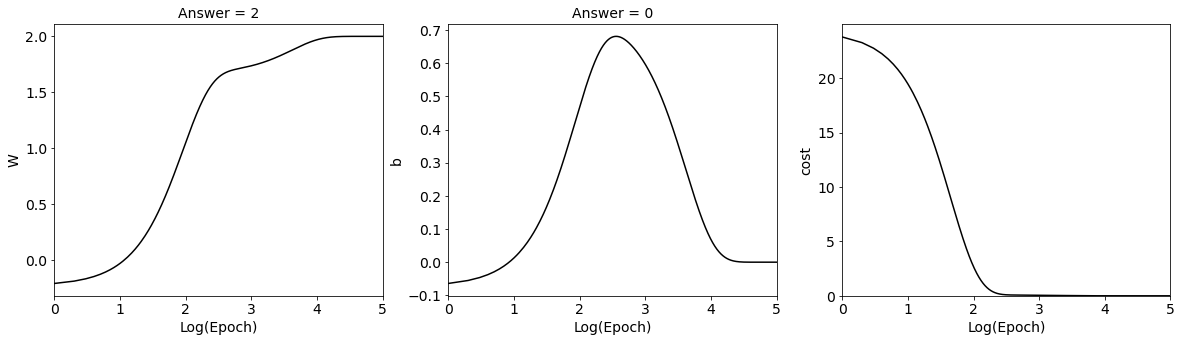

In [8]:
fontsize=14
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.title('Answer = 2', fontsize=fontsize)
plt.plot(np.log10(epoch_), W_, color='k')
plt.xlabel('Log(Epoch)', fontsize=fontsize)
plt.ylabel('W', fontsize=fontsize)
plt.xlim(0, np.log10(epoch_num))
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.subplot(1, 3, 2)
plt.title('Answer = 0', fontsize=fontsize)
plt.plot(np.log10(epoch_), b_, color='k')
plt.xlabel('Log(Epoch)', fontsize=fontsize)
plt.ylabel('b', fontsize=fontsize)
plt.xlim(0, np.log10(epoch_num))
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.subplot(1, 3, 3)
plt.plot(np.log10(epoch_), cost_, color='k')
plt.xlabel('Log(Epoch)', fontsize=fontsize)
plt.ylabel('cost', fontsize=fontsize)
plt.xlim(0, np.log10(epoch_num))
plt.ylim(bottom=0)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.show()